<center><font color='black' style='font-family:verdana; font-size:25px'>Predict Restaurant Ratings</font></center>
<hr style="color: black; height: 1px;">


<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Objective</font></b>
<br>

<font color="black" style="font-family:Cambria; font-size:16px">Build a `machine learning model` to predict the `aggregate rating of a restaurant` based on various features. The goal is to preprocess the dataset, train a regression model, evaluate its performance, and interpret the results to understand the most influential factors affecting restaurant ratings.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Steps:</font></b>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Data Preprocessing:</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Handle Missing Values`: Identify and impute or remove missing values in the dataset to ensure data integrity.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Encode Categorical Variables:` Convert categorical features into numerical representations using suitable encoding techniques.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Split Data:` Divide the dataset into training and testing sets to evaluate the model's performance.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Feature Selection and Encoding:</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Identify Relevant Features:` Determine which features are likely to influence the aggregate rating.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Target Encoding:` Use target encoding for categorical variables to capture the relationship between the feature and the target variable.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Model Training:</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Select Regression Algorithm:` Choose an appropriate regression algorithm (e.g., Random Forest Regressor) for prediction.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Train the Model:` Train the chosen regression model on the training data.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Model Evaluation:</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Evaluate Performance:` Assess the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Hyperparameter Tuning:` Optimize the model's parameters using techniques like RandomizedSearchCV to enhance performance.</font>
<br>

<b><font color='#067F7D' style='font-family:cambria; font-size:20px'>Interpretation and Analysis:</font></b>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Analyze Results:` Interpret the model's results to understand the most influential features affecting restaurant ratings.</font>
<br>

- <font color="black" style="font-family:Cambria; font-size:16px">`Feature Importance:` Determine which features contribute most to the model's predictions.</font>
<br>


<font color="black" style="font-family:Cambria; font-size:20px">Importing Necessary Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import warnings
warnings.filterwarnings('ignore')

<font color="black" style="font-family:Cambria; font-size:20px">Reading the dataset</font>

In [2]:
df=pd.read_csv('Dataset .csv')

In [3]:
# head
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [4]:
print('The Shape Of the data set is :' ,df.shape)

The Shape Of the data set is : (9551, 21)


In [5]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<font color="black" style="font-family:cambria; font-size:18px">Arranging the data in a good format Categorical one side and Numerical Columns are another side </font>

In [6]:
catogorical=df.select_dtypes('object')

In [7]:
numerical=df[['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]

In [8]:
numerical.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], dtype='object')

In [9]:
df=pd.concat([df['Restaurant ID'],catogorical,numerical],axis=1)

In [10]:
df.head(3)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good,162,121.056831,14.581404,4000,4,4.4,270


<font color="black" style="font-family:Cambria; font-size:20px">Checking Null Values</font>

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Rating color            0
Rating text             0
Country Code            0
Longitude               0
Latitude                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64


<b><font color='Black' style='font-family:cambria; font-size:20px'>Handling Missing Values:</font></b>
<br>

<font color="brown" style="font-family:cambria; font-size:16px">`Our DataFrame` (df) `does not` have any `missing values` except in the `Cuisines column`, where there are `9 missing values`. Handling missing values is an `important step` in data preprocessing to ensure accurate analysis and modeling. Here are `some common approaches` we can consider: </font>

<font color="black" style="font-family:Cambria; font-size:18px">`1. Drop rows with missing values:`</font>
<br>

- <font color="brown" style="font-family:Cambria; font-size:16px">If the `number of rows` with missing values is `small relative` to the dataset size and `does not significantly` impact `our analysis`, we can  `drop these rows also`.</font>
<br>

<font color="black" style="font-family:Cambria; font-size:18px">`2. Imputation :`</font>
<br>

- <font color="brown" style="font-family:Cambria; font-size:16px">`Replace missing values` with a suitable substitute, such as the `mean, median, mode`, or a custom value based on the data's distribution and characteristics.</font>
<br>


<font color="brown" style="font-family:cambria; font-size:16px">`Cuisines is a `categorical column` with missing values, we can `handle them differently` compabrown to `numerical columns`. one  approach can be </font>

<b><font color='Black' style='font-family:cambria; font-size:20px'>Handling Missing Values in Categorical Columns:</font></b>
<br>

<font color="brown" style="font-family:cambria; font-size:16px">`Mode Imputation:` Replace missing values with the `most frequent category (mode)` since it's a categorical column.</font>


In [12]:
df['Cuisines'].mode()[0]

'North Indian'

In [13]:
# filling 9 na values with north Indian
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)


<b><font color='Black' style='font-family:cambria; font-size:20px'>Cleaning `Special Characters` from DataFrame Columns:</font></b>
<br>

<font color="brown" style="font-family:cambria; font-size:17px">`Special characters`, such as `non-ASCII` symbols or `invalid UTF-8` characters, can often be present in text data due to various reasons such as `encoding issues` or `data collection methods`. Cleaning these characters is essential for several reasons: </font>

<font color="brown" style="font-family:Cambria; font-size:16px">`1. Data Integrity :`Removing special characters ensures that your data remains consistent and readable.</font>
<br>

<font color="brown" style="font-family:Cambria; font-size:16px">`2. Normalization :`By removing special characters, you normalize the text data, making it uniform and suitable for downstream tasks such as machine learning model training</font>
<br>

<font color="brown" style="font-family:Cambria; font-size:16px">`3. Improving the data Quality : `Clean data enhances the quality and reliability of analysis results. It blackuces the risk of errors caused by unexpected characters that may not be handled correctly by algorithms or applications.</font>
<br>


In [14]:
# Assuming df is your DataFrame and you want to clean specific columns
name = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose','Currency']

In [15]:
df[name].tail()

,Restaurant Name,City,Address,Locality,Locality Verbose,Currency
9546,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish Lira(TL)
9547,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",Turkish Lira(TL)
9548,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Turkish Lira(TL)
9549,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Turkish Lira(TL)
9550,Walter's Coffee Roastery,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",Turkish Lira(TL)


In [16]:
df['Restaurant Name'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                  Naml Gurme
9547                   Ceviz Aac
9548                       Huqqa
9549                    Ak Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

<font color="brown" style="font-family:cambria; font-size:17px">The `loop iterates` through each specified column (name) and applies the `cleaning operation`, ensuring that special characters are removed uniformly across all selected columns. </font>
<br>



In [17]:
for i in name:
    df[i] = df[i].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [18]:
df[name].tail()

,Restaurant Name,City,Address,Locality,Locality Verbose,Currency
9546,Naml Gurme,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",Turkish Lira(TL)
9547,Ceviz Aac,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",Turkish Lira(TL)
9548,Huqqa,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",Turkish Lira(TL)
9549,Ak Kahve,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",Turkish Lira(TL)
9550,Walter's Coffee Roastery,stanbul,"Cafeaa Mahallesi, Bademalt Sokak, No 21/B, Kad...",Moda,"Moda, stanbul",Turkish Lira(TL)


<font color="brown" style="font-family:cambria; font-size:17px">By cleaning special characters in this manner, we prepare  data for `further analysis` or application without the risk of encountering unexpected issues related to non-standard characters. </font>

In [19]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [20]:
numerical.corr()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country Code,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


In [21]:
len(df['Restaurant Name'].unique())

7446

In [22]:
len(df['City'].unique())

141

In [23]:
len(df['Cuisines'].unique())

1825

In [24]:
df['City'].value_counts()[:5]

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

<font color="black" style="font-family:Cambria; font-size:20px">Value_counts Of Columns</font>

In [25]:
a=['Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text']
for i in a :
    print(df[i].value_counts())
    print('-'*70)
    

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64
----------------------------------------------------------------------
Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds()                    80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($) 

<font color="black" style="font-family:Cambria; font-size:17px">`Exploratory Data Analysis (EDA)` is an essential first step in data analysis, involving visual and statistical methods to understand dataset characteristics. It helps uncover patterns, outliers, and relationships between variables, using tools like histograms and scatter plots. EDA guides further analysis and modeling by providing insights into data structure and behavior</font>

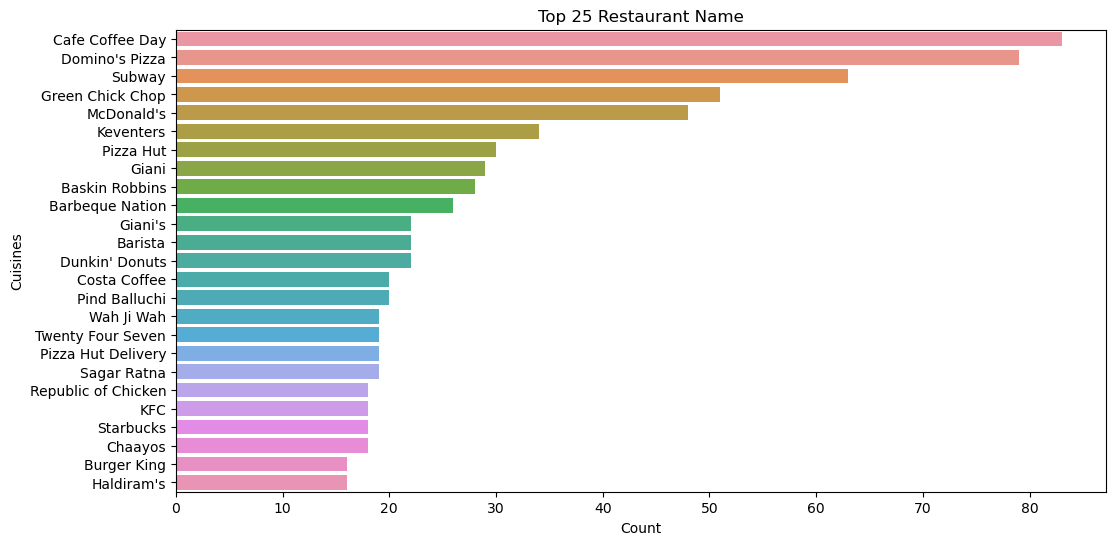

In [26]:

# Bar plot for Restaurant Name (Top 25)
plt.figure(figsize=(12, 6))
top_restaurant = df['Restaurant Name'].value_counts().head(25)
sns.barplot(x=top_restaurant.values, y=top_restaurant.index)
plt.title('Top 25 Restaurant Name')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Top 25 Restaurant Names` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The `horizontal bar chart` titled `Top 25 Restaurant Names` displays the count of different restaurant names. Each bar represents a restaurant, and they are color-coded. Here are some notable observations:</font><br><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Cafe Coffee Day`: Appears to be the most popular restaurant with a count close to `80`.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Domino’s Pizza, Subway, and Green Chick Chop`: Also have significant counts.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Burger King`: Has the lowest count among the top `25` restaurants.</font><br>


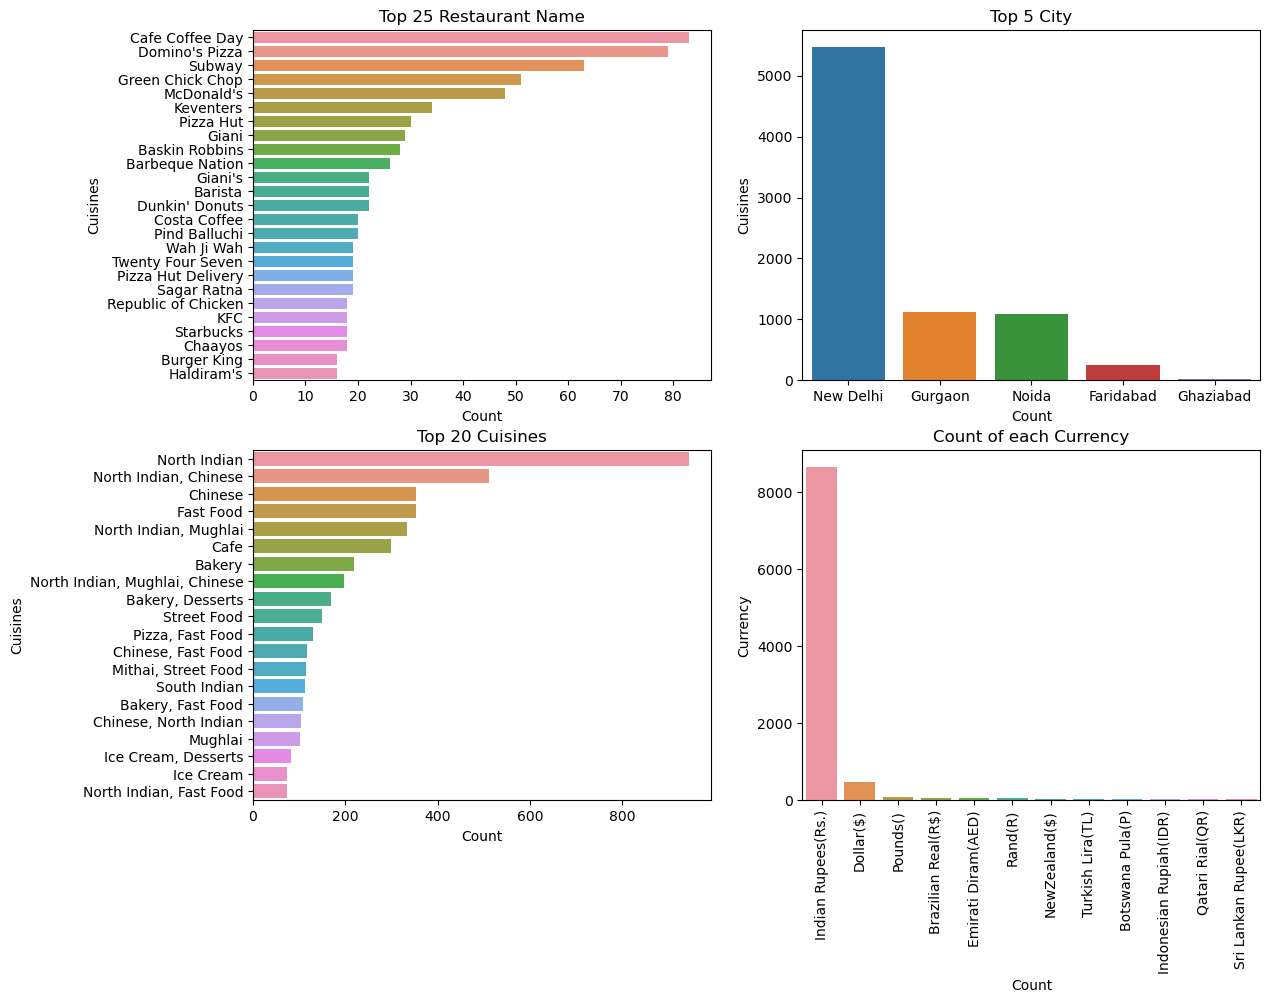

In [27]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)

top_restaurant = df['Restaurant Name'].value_counts().head(25)
sns.barplot(x=top_restaurant.values, y=top_restaurant.index)
plt.title('Top 25 Restaurant Name')
plt.xlabel('Count')
plt.ylabel('Cuisines')


plt.subplot(2,2,2)
top_city = df['City'].value_counts().head(5)
sns.barplot(y=top_city.values, x=top_city.index)
plt.title('Top 5 City')
plt.xlabel('Count')
plt.ylabel('Cuisines')

plt.subplot(2,2,3)
top_cuisines = df['Cuisines'].value_counts().head(20)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 20 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')

plt.subplot(2,2,4)
sns.barplot(y=df['Currency'].value_counts().values,x=df['Currency'].value_counts().index)
plt.title('Count of each Currency')
plt.xlabel('Count')
plt.ylabel('Currency')
plt.xticks(rotation=90)

plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 2` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Top 25 Restaurant Names`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The image displays a `horizontal bar chart` showing the `top 25 restaurant` names. Some notable names include  `Cafe Coffee Day,   Domino’s Pizza,   Subway,  and  McDonald’s....`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>These popular restaurants could be relevant for market analysis or competitive research.</font><br><br>



<font color=blue style='font-family:Cambria; font-size:15px'>`Top 5 Cities`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `vertical bar chart` highlights the `top 5 cities`. Notable cities include  `New Delhi,   Gurgaon,   Noida,  and  Faridabad`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This data could be useful for understanding regional preferences or targeting specific locations for restaurant expansion.</font><br><br>



<font color=blue style='font-family:Cambria; font-size:15px'>`Top 20 Indian Cuisines`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Another `horizontal bar chart` shows the `top 20 Indian cuisines`. Common cuisines include  `North Indian,   Chinese,  and  Mughlai`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This information could guide menu planning or help identify culinary trends.</font><br><br>



<font color=blue style='font-family:Cambria; font-size:15px'>`Count of Each Currency`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `vertical bar chart` represents the count of different currencies used. Notable `currencies` include  `Indian Rupees (Rs),   US Dollars ($),  and  British Pounds (£)`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Understanding currency usage can be valuable for financial analysis or pricing strategies.</font><br>


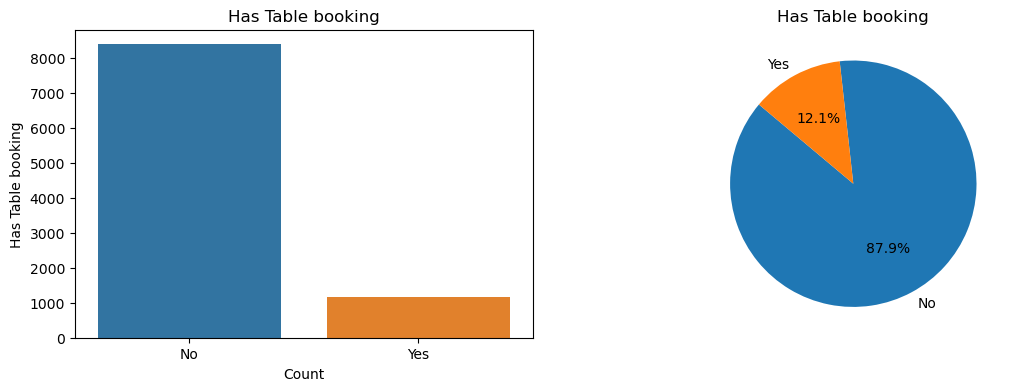

In [28]:
# Bar plot for Has Table booking
plt.figure(figsize=(13, 4))
plt.subplot(1,2,1)

sns.barplot(y=df['Has Table booking'].value_counts().values, x=df['Has Table booking'].value_counts().index)
plt.title('Has Table booking')
plt.xlabel('Count')
plt.ylabel('Has Table booking')


# Pie chart for Has Table booking
plt.subplot(1,2,2)
df['Has Table booking'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Has Table booking')
plt.ylabel('')

plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 3` </font></b><br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Has Table Booking` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The `left bar graph` shows the count of responses for `Has Table Booking.` There are two categories: `Yes` and `No.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `No` category has a significantly higher count, suggesting that a larger proportion of entities do not have table booking options.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `Yes` category represents a smaller count of entities with table booking.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Percentage Distribution`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `right pie chart` also represents `Has Table Booking.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Approximately `87.9%` of entities do not have table booking, while only `12.1%` offer this service.</font><br>


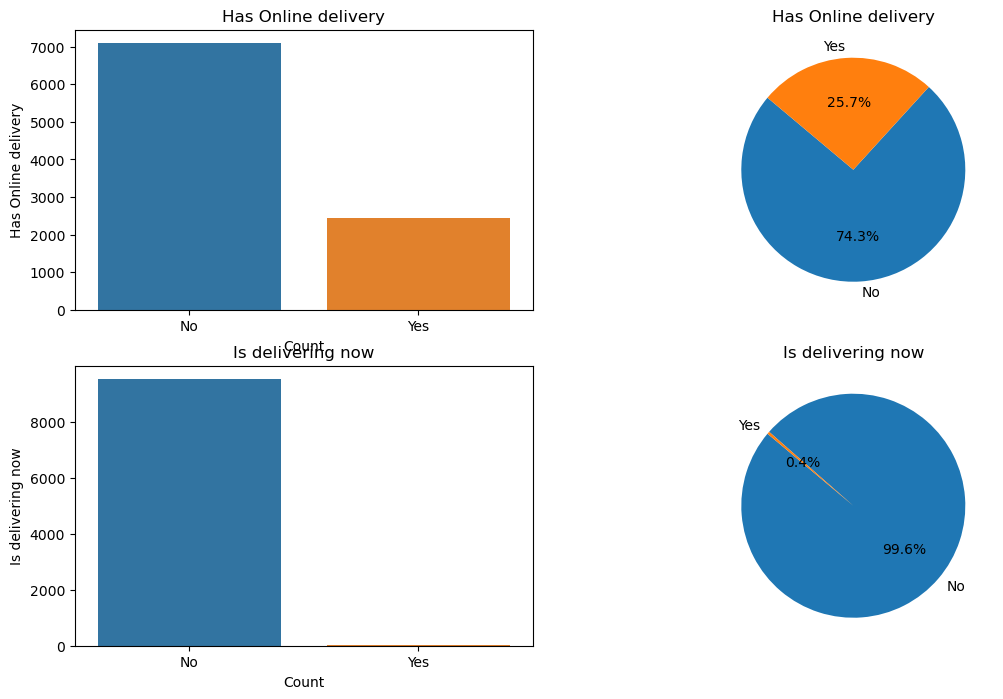

In [29]:
# Bar plot for Has Online delivery
plt.figure(figsize=(13, 8))
plt.subplot(2,2,1)

sns.barplot(y=df['Has Online delivery'].value_counts().values, x=df['Has Online delivery'].value_counts().index)
plt.title('Has Online delivery')
plt.xlabel('Count')
plt.ylabel('Has Online delivery')



plt.subplot(2,2,2)
df['Has Online delivery'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Has Online delivery')
plt.ylabel('')


plt.subplot(2,2,3)
sns.barplot(y=df['Is delivering now'].value_counts().values, x=df['Is delivering now'].value_counts().index)
plt.title('Is delivering now')
plt.xlabel('Count')
plt.ylabel('Is delivering now')

# Pie chart for Is delivering now
plt.subplot(2,2,4)
df['Is delivering now'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Is delivering now')
plt.ylabel('')

plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 4` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Has Online Delivery` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The `left bar graph` shows two categories: `Yes` and `No.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `blue bar` (representing `No`) is significantly higher, indicating that a larger number of entities do not offer online delivery.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `orange bar` (representing `Yes`) represents a smaller count of entities with online delivery.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Percentage Distribution`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `right pie chart` also relates to online delivery.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Approximately `87.9%` of entities do not provide online delivery (blue section), while only `12.1%` do (orange section).</font><br><br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Is Delivering Now` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The `third graph` (another bar chart) compares `Yes` and `No` for current delivery status.</font><br><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `blue bar` (for `No`) dominates, suggesting that very few entities are currently delivering.</font><br>


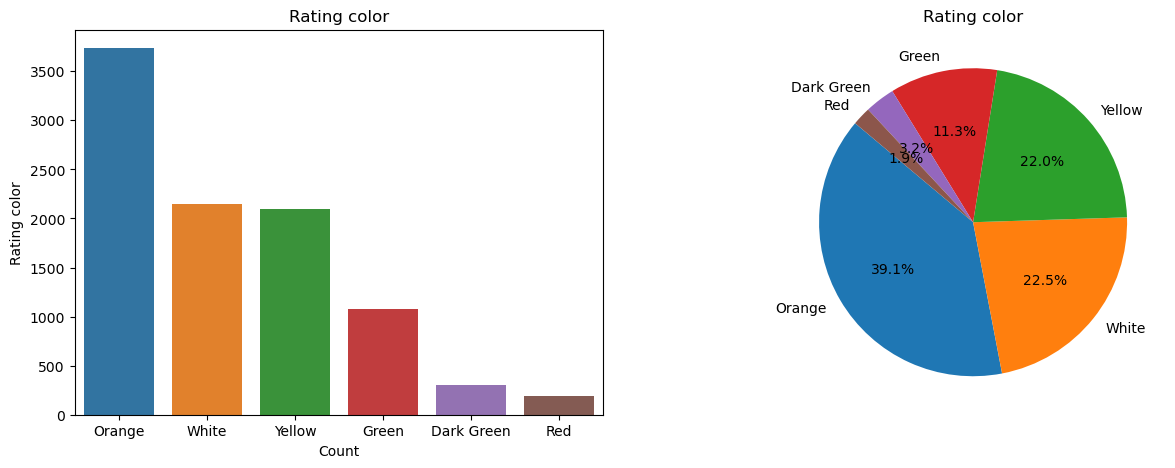

In [30]:
# Bar plot for Rating color
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)

sns.barplot(y=df['Rating color'].value_counts().values, x=df['Rating color'].value_counts().index)
plt.title('Rating color')
plt.xlabel('Count')
plt.ylabel('Rating color')

# Pie chart for Rating color
plt.subplot(1,2,2)

df['Rating color'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Rating color')
plt.ylabel('')

plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 5` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Rating Color Distribution` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The `left bar chart` displays six different colors: `orange, white, yellow, green, dark green, and red.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Each color represents a `rating category.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `vertical axis` shows the `Rating count,` ranging from `0 to 3500.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Notably, the `blue bar` (representing `No`) dominates the chart, indicating a higher count for that rating color.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Percentage Breakdown`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `right pie chart` further breaks down the rating colors:</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Green: 39.1%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Yellow: 22.0%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`White: 22.5%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Dark Green: 11.3%`</font><br>

  - <font color=blue style='font-family:Cambria; font-size:15px'>`Red: 5.1%`</font><br><br>


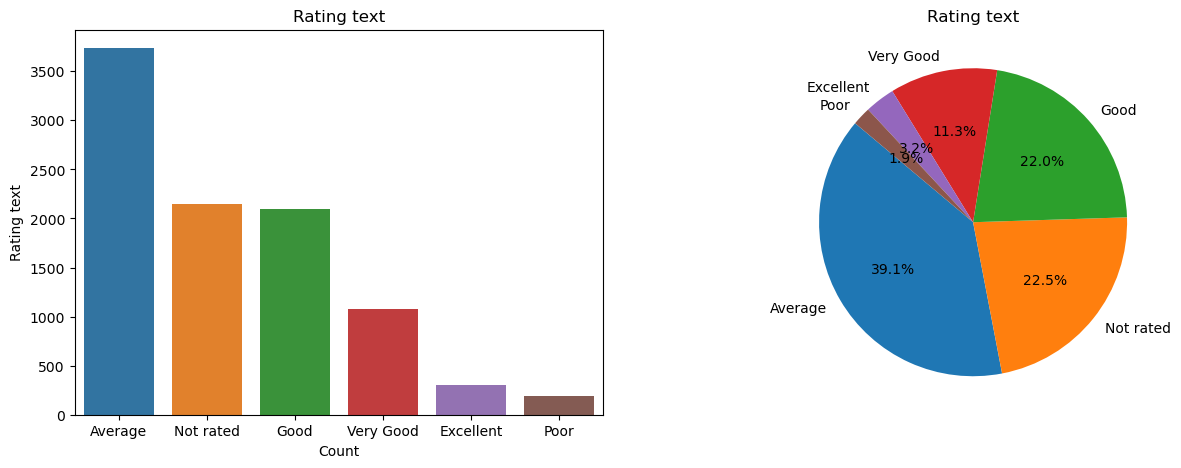

In [31]:
# Bar plot for Rating text
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(y=df['Rating text'].value_counts().values, x=df['Rating text'].value_counts().index)
plt.title('Rating text')
plt.xlabel('Count')
plt.ylabel('Rating text')

# Pie chart for Rating text

plt.subplot(1,2,2)
df['Rating text'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Rating text')
plt.ylabel('')
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 6` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Bar Chart (Left Side)` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The bar chart displays `six` rating categories:  `Average,   Not rated,   Good,   Very Good,   Excellent,  and  Poor`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The  `Average  category` has the `highest count`, while  Poor  has the lowest.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This suggests that most ratings fall into the  Good  range, which could indicate overall satisfactory experiences.</font><br><br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Pie Chart (Right Side)` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The pie chart represents the distribution of ratings.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The largest segment corresponds to  `Average  ratings`, accounting for `39.1`% of the total.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Very Good`  and  `Good`  follow `closely`, while  `Poor ` has the `smallest share`.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The unlabeled segment likely represents  Not rated  reviews.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Overall, the `majority of ratings` are in the middle range ( `Average  and  Good` ).</font><br>


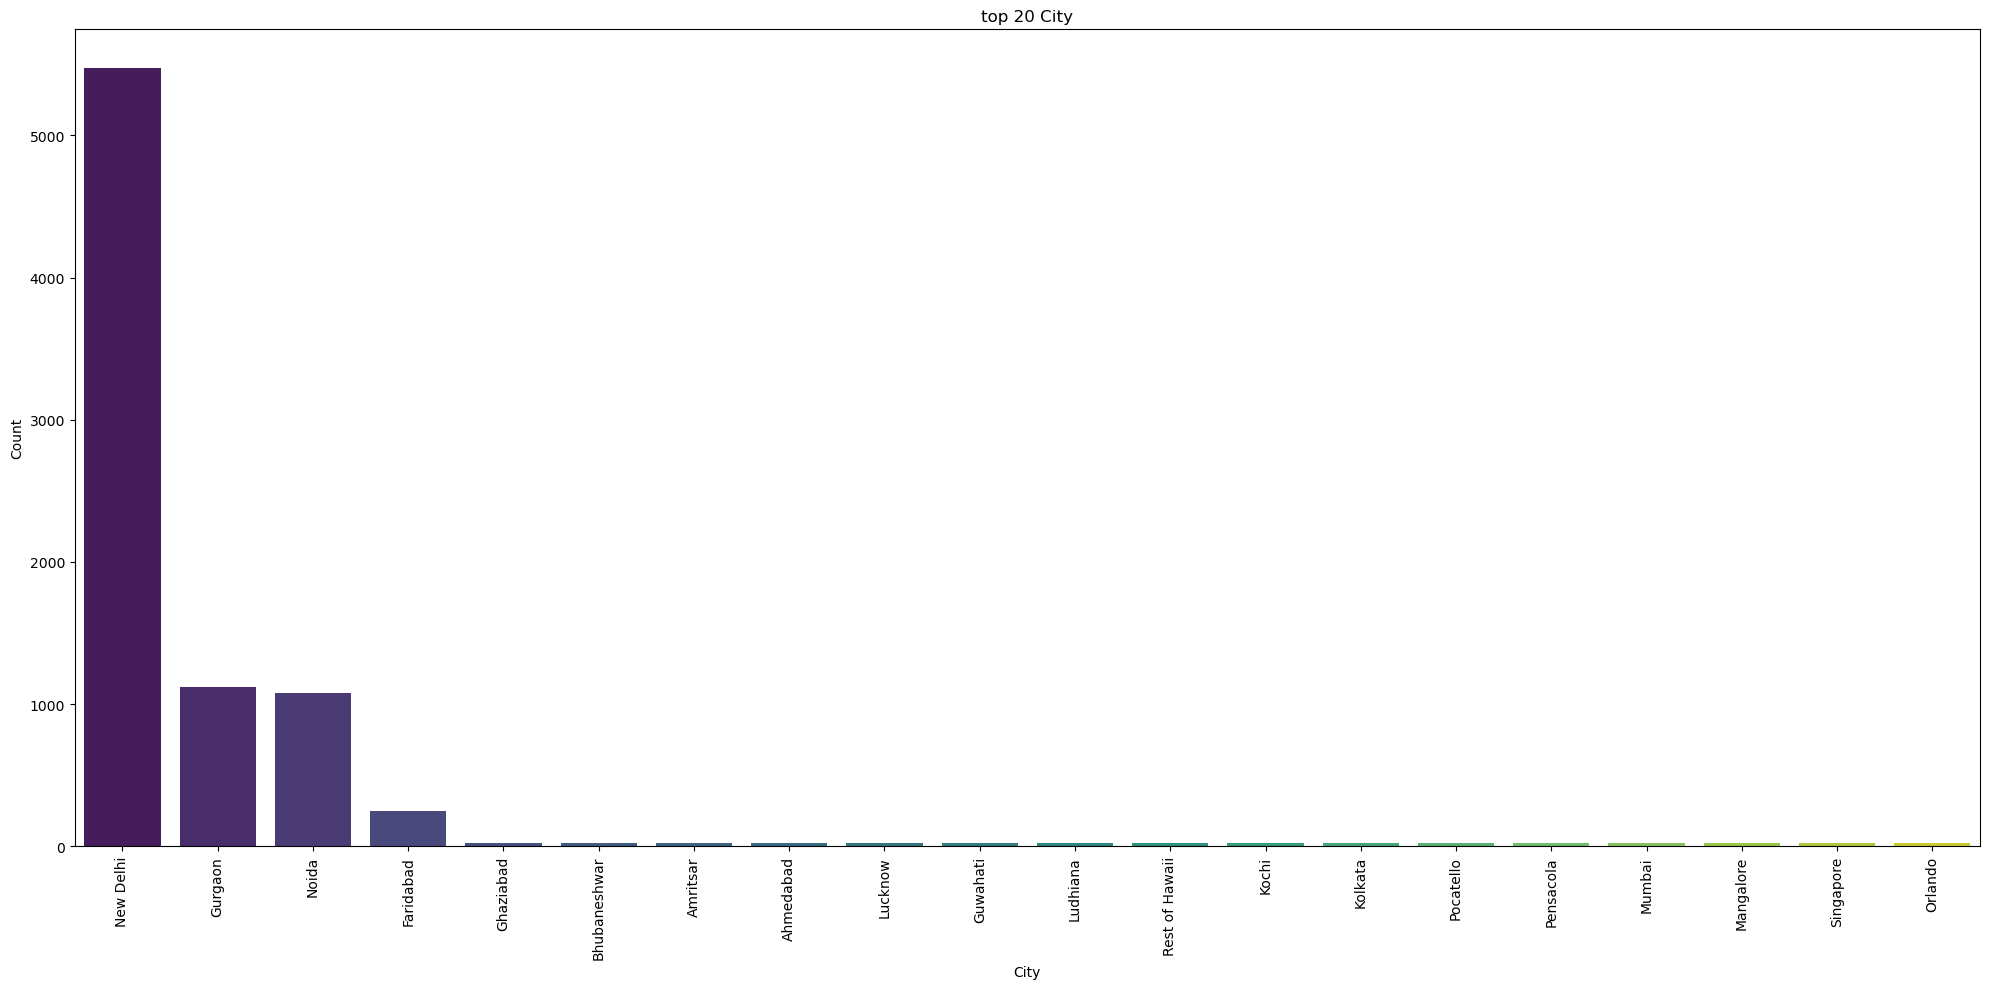

In [32]:


# Bar plot of counts by City
plt.figure(figsize=(20,10 ))
top_city = df['City'].value_counts().head(20)
sns.barplot(x=top_city.index,y=top_city.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('top 20 City')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


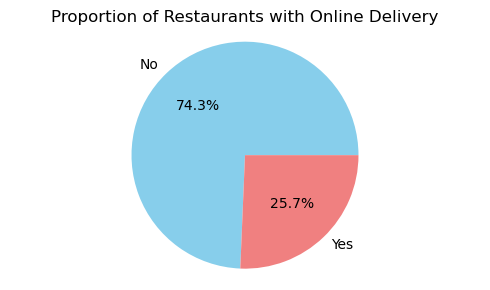

In [33]:
# Pie chart of delivery options
delivery_counts = df['Has Online delivery'].value_counts()
plt.figure(figsize=(5, 3))
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Restaurants with Online Delivery')
plt.axis('equal')
plt.tight_layout()
plt.show()

<font color="black" style="font-family:Cambria; font-size:17px">Visualizations Based on Numerical Columns</font>

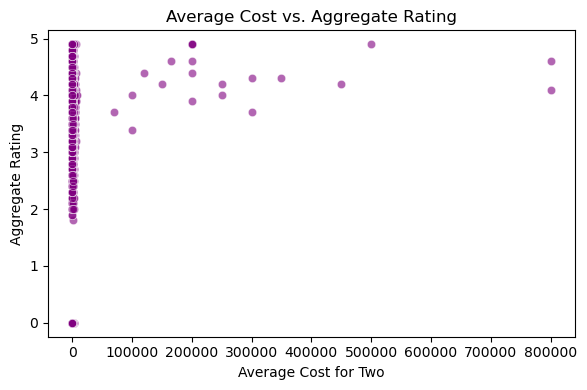

In [34]:
# Scatter plot: Average Cost vs. Aggregate Rating
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, color='purple', alpha=0.6)
plt.title('Average Cost vs. Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()

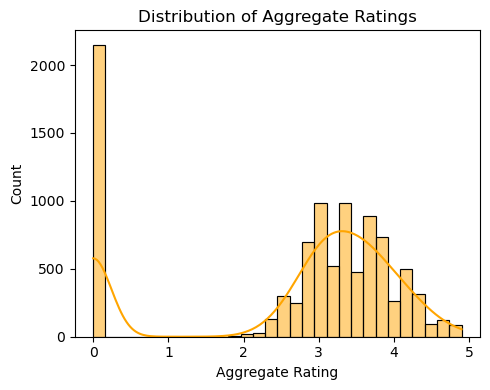

In [35]:
# Histogram of Aggregate Ratings
plt.figure(figsize=(5, 4))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='orange')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 7` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Distribution of Aggregate Ratings` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>Here are some insights:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `x-axis` represents `Aggregate Rating` and ranges from `0 to 5.`</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `y-axis` represents the frequency of each rating (labeled as `Count`).</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `histogram` shows a `right-skewed distribution,` with more `high ratings` than low ones.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `line graph` peaks around middle ratings (between `2 and 3`) and tapers off towards higher ratings.</font><br>


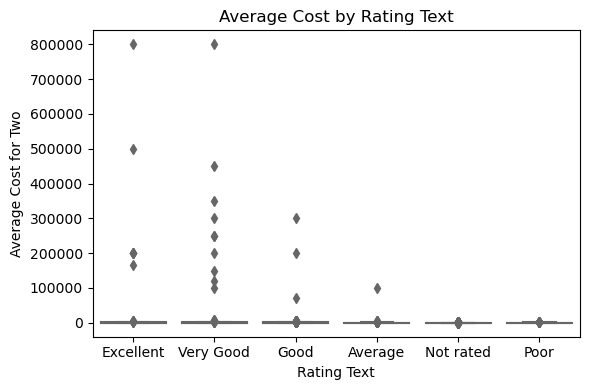

In [36]:
# Box plot: Average Cost by Rating Text
plt.figure(figsize=(6, 4))
sns.boxplot(x='Rating text', y='Average Cost for two', data=df, palette='Set3')
plt.title('Average Cost by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Cost for Two')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 8` </font></b>
<br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Average Cost by Rating Text`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>The scatter plot shows the distribution of the `average cost for two` across different `rating texts` (e.g., `Excellent, Very Good, Good`).</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>There are significant outliers in each category, indicating that some high-cost restaurants receive varied ratings.</font><br><br>

<font color="black" style="font-family:Cambria; font-size:17px">Histograms and Distribution Plots</font>

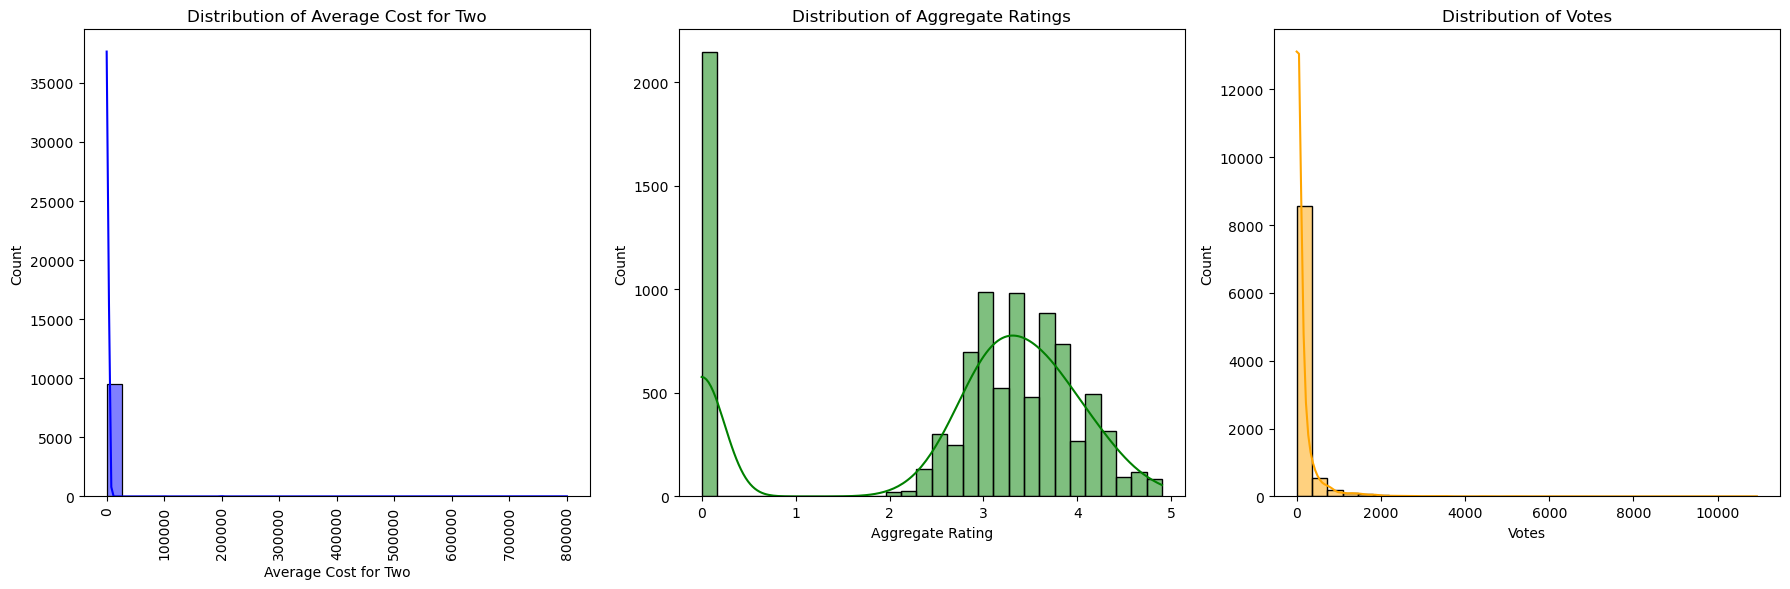

In [37]:
# Histogram of 'Average Cost for two'
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.histplot(df['Average Cost for two'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(1,3,2)


# Histogram of 'Aggregate rating'

sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='green')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1,3,3)

# Histogram of 'Votes'

sns.histplot(df['Votes'], bins=30, kde=True, color='orange')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 9` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Distribution of Average Cost for Two` </font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The leftmost graph shows the `distribution of average cost for two people` dining at restaurants. It appears to be`heavily skewed` to the `right`, indicating that most restaurants have lower average costs, with a few exceptions having higher costs.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This information could be useful for `understanding pricing trends` and identifying outliers in your dataset.</font><br><br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Distribution of Aggregate Ratings` </font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The middle graph represents the `distribution of aggregate ratings` for restaurants. It forms a `bell-shaped curve`, suggesting that most ratings fall around an average value.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This distribution could help you `analyze overall restaurant quality` and identify any patterns related to ratings.</font><br><br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Distribution of Votes` </font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The graph on the right displays the `distribution of votes received` by restaurants. Similar to the first graph, it’s `skewed to the right`, indicating that most restaurants receive a low number of votes.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This data could be relevant for `assessing restaurant popularity` and engagement.</font><br>


<font color="black" style="font-family:Cambria; font-size:17px">Bar Plots</font>

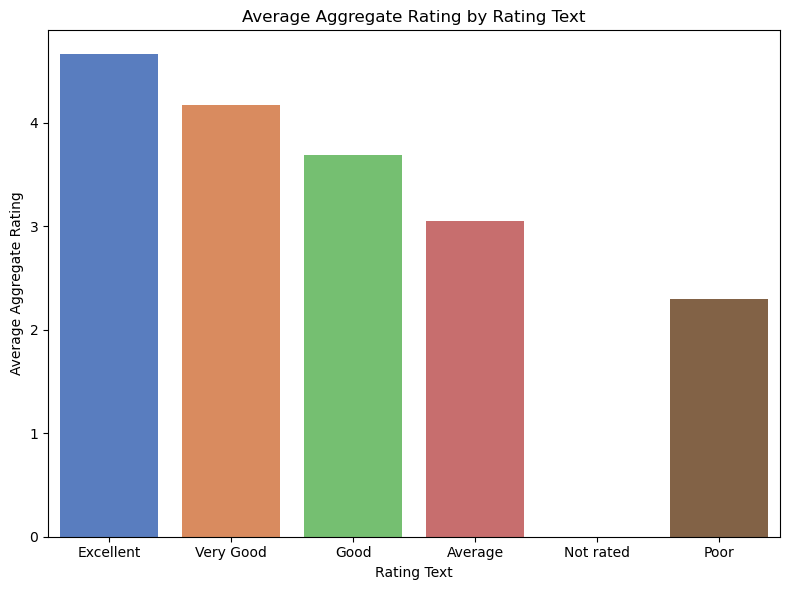

In [38]:
# Bar plot of average 'Aggregate rating' by 'Rating text'
plt.figure(figsize=(8, 6))
sns.barplot(x='Rating text', y='Aggregate rating', data=df, palette='muted', ci=None)
plt.title('Average Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Aggregate Rating')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 10` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Average Aggregate Rating by Rating Text` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The bar chart provides an overview of `average aggregate ratings` across different `rating categories`.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Here’s a breakdown of the ratings:</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Excellent`:The highest `average aggregate rating`, exceeding 4.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Very Good`:Just below 4, indicating strong satisfaction.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Good`:In the mid-3 range, representing positive feedback.</font><br>


<font color=blue style='font-family:Cambria; font-size:15px'>`Average`:Slightly above 2, suggesting room for improvement.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Not rated`:No visible data, possibly indicating missing or unsubmitted ratings.</font><br>


<font color=blue style='font-family:Cambria; font-size:15px'>`Poor`:An `average aggregate rating` of approximately 1, signifying dissatisfaction.</font><br>



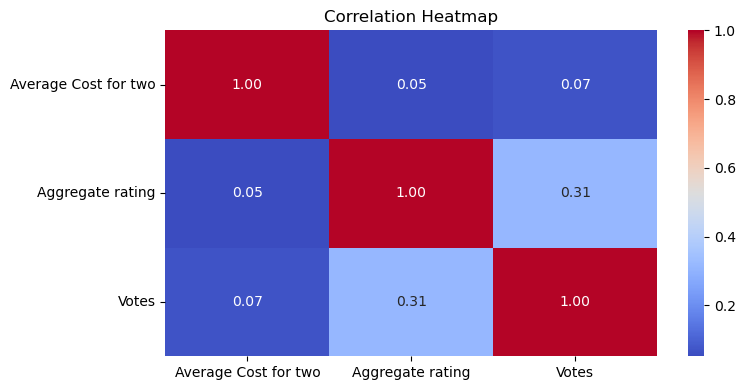

In [39]:
# Heatmap of correlations between numerical variables
plt.figure(figsize=(8 ,4))
sns.heatmap(df[['Average Cost for two', 'Aggregate rating', 'Votes']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 11` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Correlation Heatmap` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The heatmap visually represents the `correlation matrix` between three variables:  `Average Cost for two,   Aggregate rating,  and  Votes`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Colors range from `blue` (positive correlation) to `red` (negative correlation), with `white` indicating little or no correlation.</font><br>

<font color=blue style='font-family:Cambria; font-size:15px'>Key observations:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Aggregate rating`   have a `positive correlation` with  Votes. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Average Cost for two`  shows `minimal correlation` with both  `Aggregate rating  and  Votes`. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> Aggregate rating  and  Votes  exhibit a `moderate positive correlation`.</font><br>


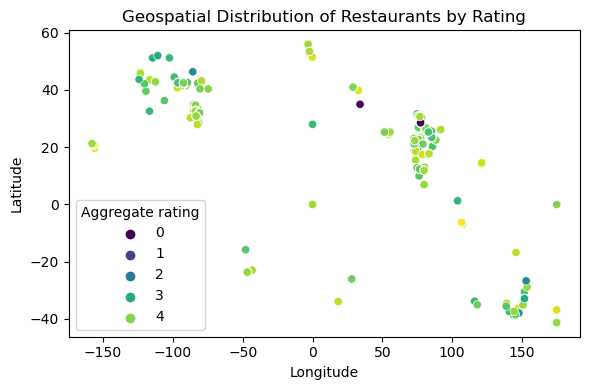

In [40]:
# Geospatial plot using latitude and longitude
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', palette='viridis', data=df)
plt.title('Geospatial Distribution of Restaurants by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


<font color="black" style="font-family:Cambria; font-size:17px">Pair Plots</font>

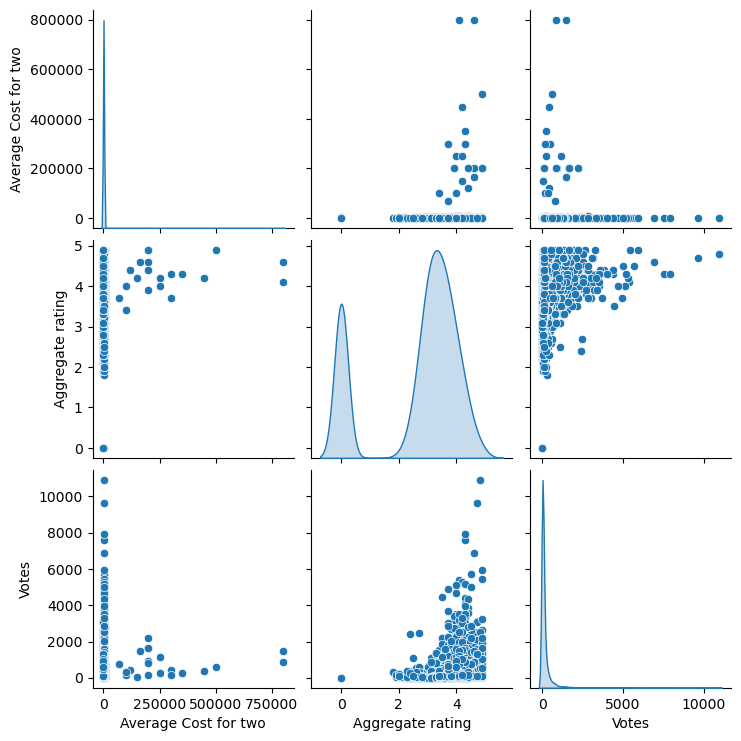

In [41]:
# Pair plot of selected numerical variables
num_vars = ['Average Cost for two', 'Aggregate rating', 'Votes']
sns.pairplot(df[num_vars], diag_kind='kde')

plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 12` </font></b>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Pair Plot Insights` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>The image is a pair plot, which displays the relationships between multiple variables.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Aggregate Rating vs Votes:` There is a `positive correlation` between aggregate ratings and the number of votes. Higher ratings tend to receive more votes.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Aggregate Rating Distribution:`The aggregate rating distribution is bimodal, with two peaks around ratings 2 and 4.</font>
<br>


- <font color=blue style='font-family:Cambria; font-size:15px'>`Average Cost for Two vs Aggregate Rating:` There is `no clear trend or correlation` between the average cost for two and aggregate ratings. Most restaurants have an `average cost` clustered around lower values, with ratings spread out across the spectrum.</font>
<br>


- <font color=blue style='font-family:Cambria; font-size:15px'>`Average Cost for Two vs Votes:`There is a `slight positive correlation` between `average cost for two` and the number of `votes`, but this is `not very strong`. Most of the data points are clustered at lower cost values with a wide range of votes.</font>
<br>


- <font color=blue style='font-family:Cambria; font-size:15px'>`Votes Distribution:` The number of votes is right-skewed, with most data points having fewer votes.</font>
<br>


- <font color=blue style='font-family:Cambria; font-size:15px'>`Average Cost for Two Distribution:` The average cost for two is `highly right-skewed`, with most restaurants having a lower cost</font>
<br>



- <font color=blue style='font-family:Cambria; font-size:15px'>`Outliers:`There are a few outliers with very high average costs for two. These outliers do not seem to follow the general trend and might indicate very high-end restaurants or errors in data.</font>
<br>



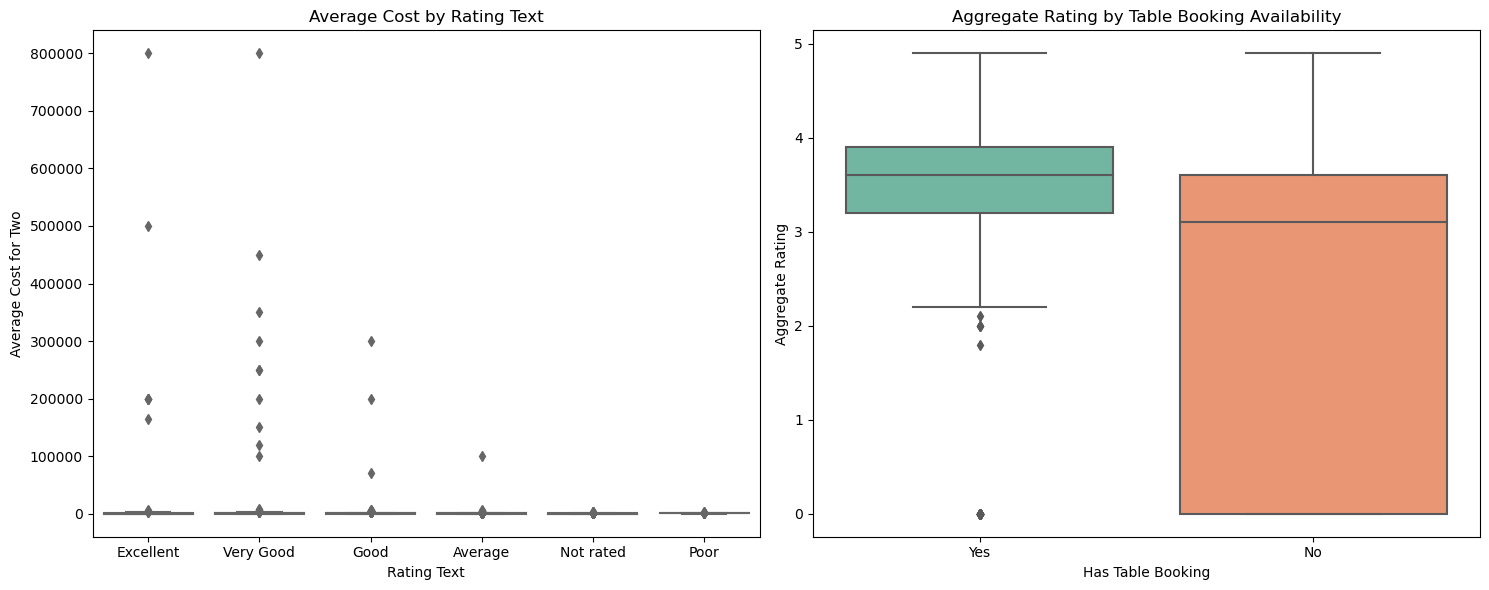

In [42]:
# Box plot: 'Average Cost for two' by 'Rating text'
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)

sns.boxplot(x='Rating text', y='Average Cost for two', data=df, palette='Set3')
plt.title('Average Cost by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Cost for Two')
plt.tight_layout()

plt.subplot(1,2,2)

# Box plot: 'Aggregate rating' by 'Has Table booking'
# plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Set2')
plt.title('Aggregate Rating by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 13` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Average Cost by Rating Text`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>The scatter plot shows the distribution of the `average cost for two` across different `rating texts` (e.g., `Excellent, Very Good, Good`).</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>There are significant outliers in each category, indicating that some high-cost restaurants receive varied ratings.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Aggregate Rating by Table Booking Availability`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>Restaurants with `table booking availability` generally have `higher aggregate ratings`.</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>This suggests that the ability to book a table may positively influence customer ratings.</font><br>


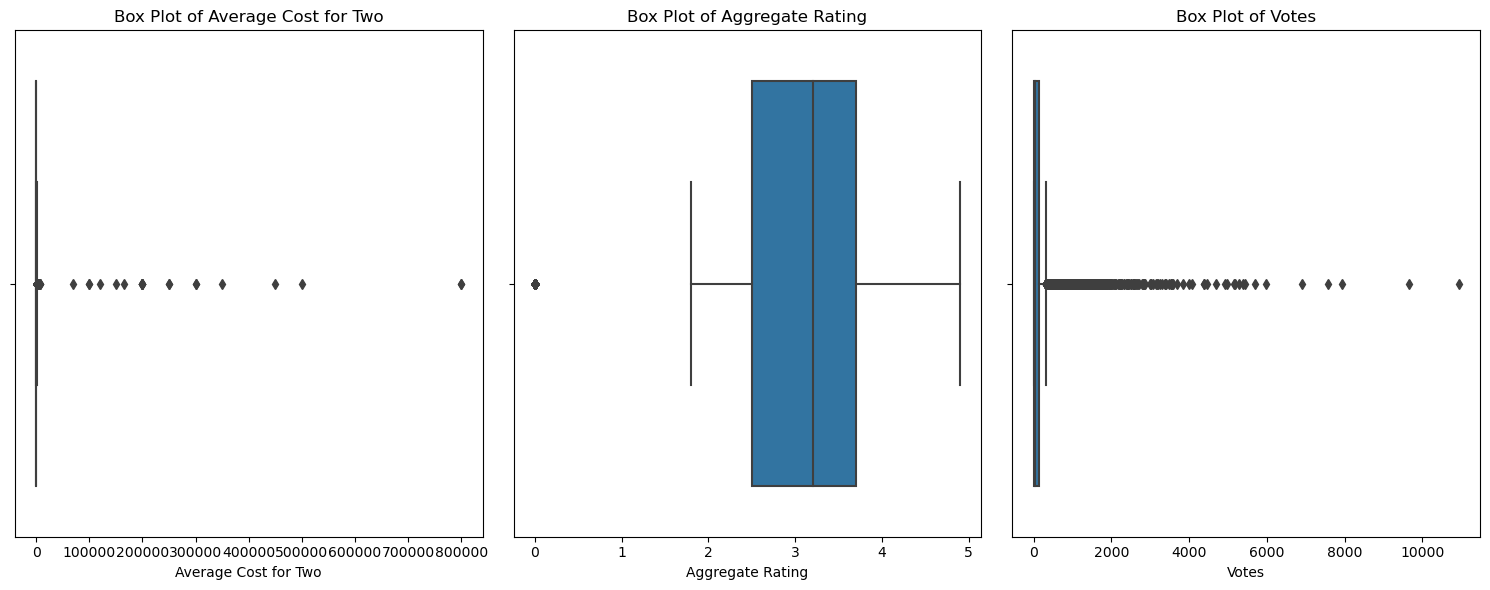

In [43]:
# Box plot to identify outliers in 'Average Cost for two'
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
sns.boxplot(x=df['Average Cost for two'])
plt.title('Box Plot of Average Cost for Two')
plt.xlabel('Average Cost for Two')
# plt.tight_layout()

plt.subplot(1,3,2)

# Box plot to identify outliers in 'Aggregate rating'
# plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Aggregate rating'])
plt.title('Box Plot of Aggregate Rating')
plt.xlabel('Aggregate Rating')
# plt.tight_layout()

plt.subplot(1,3,3)

# Box plot to identify outliers in 'Votes'
# plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Votes'])
plt.title('Box Plot of Votes')
plt.xlabel('Votes')
plt.tight_layout()
plt.show()




<b><font color=black style='font-family:Cambria; font-size:17px'> `Box Plot Analysis` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Average Cost for Two`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>The distribution is `highly skewed with many outliers`, indicating a `few restaurants` have significantly `higher costs` than the majority.</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>Most data points are concentrated at the lower end of the cost spectrum.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Aggregate Rating`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>The ratings are `spread relatively evenly between 2 and 4`, with some outliers.</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>This suggests that most restaurants have moderate to good ratings.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Votes`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>The majority of the votes are concentrated at the `lower end`, with a `long tail of outliers`.</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>This indicates that a few restaurants receive a `very high number of votes`, while most receive relatively few.</font><br>



In [44]:
from wordcloud import WordCloud

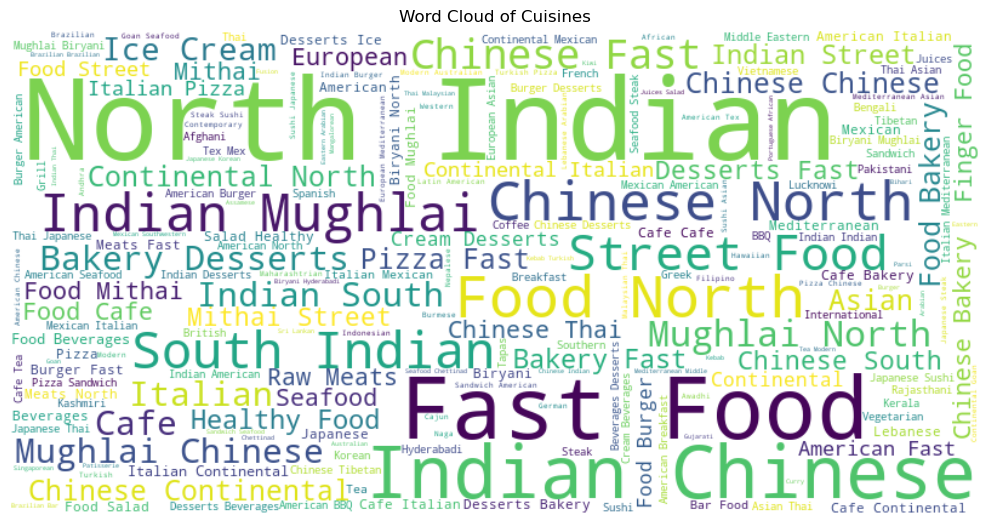

In [45]:
from wordcloud import WordCloud

# Create a word cloud for 'Cuisines'
cuisine_text = ' '.join(df['Cuisines'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cuisines')
plt.axis('off')
plt.tight_layout()
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Visualization 14` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Word Cloud of Cuisines`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The word cloud visualizes the `frequency of different cuisines` mentioned in the dataset. Here are some observations:</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Most Common Cuisines`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`North Indian,   Chinese,   Fast Food,  and  South Indian` are the most frequently mentioned cuisines. </font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Other popular cuisines include `Mughlai,   Bakery,  and  Street Food`.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:15px'>`Diversity`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The dataset contains a `wide variety of cuisines`, indicating a diverse restaurant market.</font><br>


<b><font color=black style='font-family:Cambria; font-size:17px'> `Insights and Recommendations` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Cuisines Influence`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>`North Indian,   Chinese,  and  Fast Food` cuisines are the most common and could have a significant impact on restaurant ratings. It might be useful to focus on these cuisines when analyzing rating patterns.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Cost and Ratings`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>There is a `large variation in the cost for two`, but the majority of restaurants have `lower costs`. This suggests that cost alone might not be the best predictor of ratings; other factors like cuisine and service quality could be more influential.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Votes Distribution`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>The `skewed distribution of votes` indicates that `popularity varies widely among restaurants`. Highly popular restaurants with many votes may set trends or have certain qualities that could be studied further.</font><br><br>

<font color=blue style='font-family:Cambria; font-size:17px'>`Table Booking`:</font><br>

- <font color=blue style='font-family:Cambria; font-size:17px'>Restaurants offering `table booking options` tend to have `higher ratings`. This could imply that convenience and service enhancements positively affect customer satisfaction.</font><br>


<b><font color="black" style="font-family:Cambria; font-size:19px">From Here Finding Outliers with `IQR` and Handling Outliers With `Capping Technique or Removing Outlier`</font><b>

<font color=BROWN style='font-family:Cambria; font-size:16px'>`Numerical Columns`: Focus on columns like `Average Cost for Two, Price Range, Aggregate Rating, and Votes` for `outlier detection` using methods like `Z-score, IQR, or visualization techniques` (e.g., box plots, scatter plots).</font><br>

In [46]:
df['Average Cost for two'].skew()

35.477914900871276

In [47]:
df['Price range'].skew()

0.8896175931442

In [48]:
df['Votes'].skew()

8.807636687709472

<font color=BROWN style='font-family:Cambria; font-size:16px'>These are the two columns which have `high outliers` they are `Average Cost for two & Votes`</font><br>

In [49]:
out_col=['Average Cost for two','Votes']

In [50]:
df1=df.copy()
df2=df.copy()

In [51]:
# capping 

for i in out_col:

    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    
    iqr=q3-q1

    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    df1[i] = np.where(df1[i] < lower_bound, lower_bound, df1[i])
    df1[i] = np.where(df1[i] > upper_bound, upper_bound, df1[i])
#     df1 = df1[(df1[i] >= lower_bound) & (df1[i] <= upper_bound)]

    print(f'Lower bound of column {i} is :',lower_bound)
    print(f'Upper bound of column {i} is :',upper_bound)

Lower bound of column Average Cost for two is : -425.0
Upper bound of column Average Cost for two is : 1375.0
Lower bound of column Votes is : -184.0
Upper bound of column Votes is : 320.0


In [52]:
df1.shape

(9551, 21)

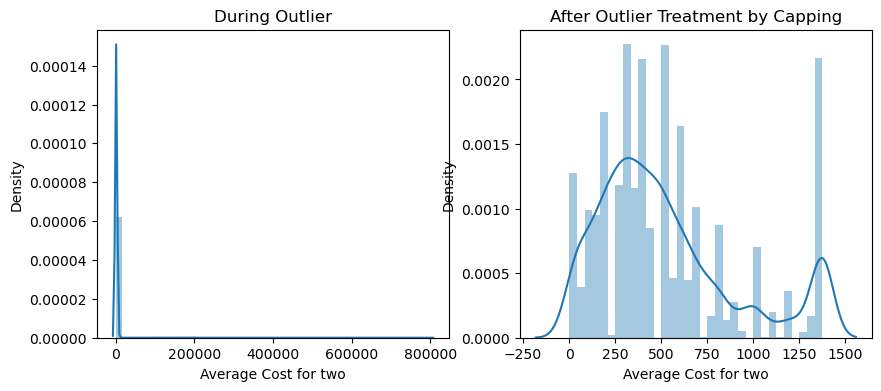

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df['Average Cost for two'])
plt.title('During Outlier')
plt.subplot(1,2,2)
sns.distplot(df1['Average Cost for two'])
plt.title('After Outlier Treatment by Capping')

plt.show()

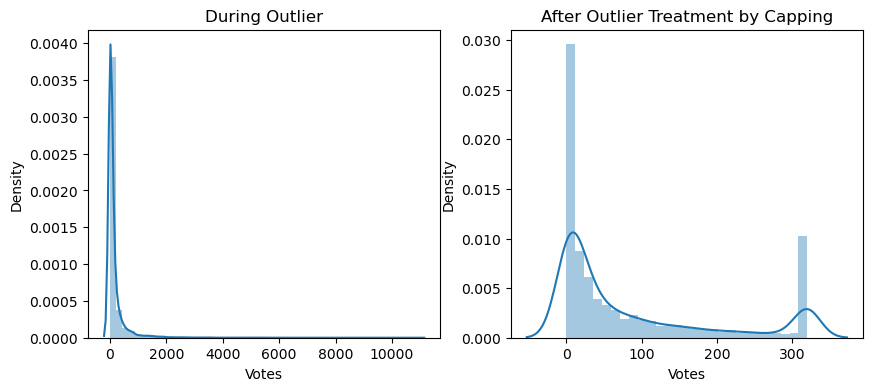

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df['Votes'])
plt.title('During Outlier')
plt.subplot(1,2,2)
sns.distplot(df1['Votes'])
plt.title('After Outlier Treatment by Capping')

plt.show()

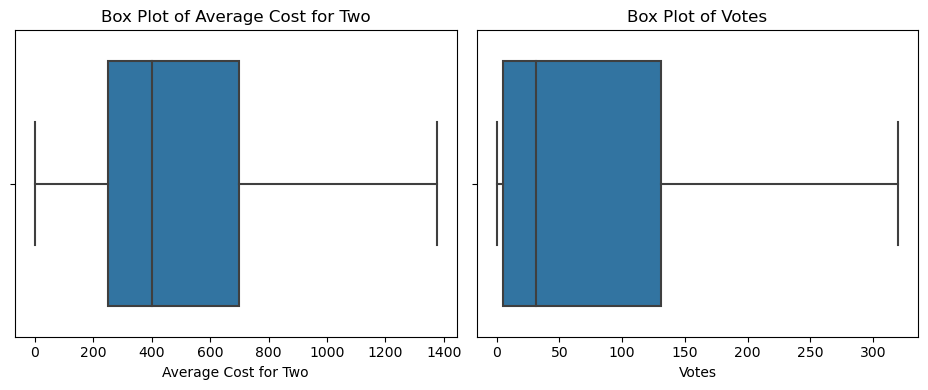

In [55]:
# Box plot to identify outliers in 'Average Cost for two'
plt.figure(figsize=(14, 4))

plt.subplot(1,3,1)
sns.boxplot(x=df1['Average Cost for two'])
plt.title('Box Plot of Average Cost for Two')
plt.xlabel('Average Cost for Two')
# plt.tight_layout()

plt.subplot(1,3,2)



# Box plot to identify outliers in 'Votes'
# plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Votes'])
plt.title('Box Plot of Votes')
plt.xlabel('Votes')
plt.tight_layout()

plt.show()

| Column               | Description                                                                                      | Preprocessing Needs                                        |
|----------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------------------|
| Restaurant ID        | Unique identifier for each restaurant. Likely not useful for prediction.                         | Drop                                                       |
| Restaurant Name      | Text feature, unlikely to contribute much to the model.                                          | Drop                                                       |
| Country Code         | Numerical code representing the country. Can keep as is or convert to categorical if necessary.   | Keep or convert to categorical if few unique values        |
| City                 | Categorical feature representing the city.                                                       | Encode                                                     |
| Address              | Text feature, probably not useful for prediction.                                                | Drop                                                       |
| Locality             | Categorical feature representing the locality.                                                   | Encode                                                     |
| Locality Verbose     | Similar to Locality, likely redundant.                                                           | Drop                                                       |
| Longitude            | Numerical feature representing the longitude of the restaurant location.                        | Keep                                                       |
| Latitude             | Numerical feature representing the latitude of the restaurant location.                          | Keep                                                       |
| Cuisines             | Categorical feature representing the type of cuisines offered.                                   | Encode                                                     |
| Average Cost for two | Numerical feature representing the average cost for two people.                                   | Keep                                                       |
| Currency             | Categorical feature representing the currency.                                                   | Encode                                                     |
| Has Table booking    | Binary categorical feature indicating if the restaurant accepts table booking.                   | Encode                                                     |
| Has Online delivery  | Binary categorical feature indicating if the restaurant offers online delivery.                  | Encode                                                     |
| Is delivering now    | Binary categorical feature indicating if the restaurant is delivering at the moment.             | Encode                                                     |
| Switch to order menu | Binary categorical feature indicating if there's an option to switch to order menu.              | Encode                                                     |
| Price range          | Numerical feature representing the price range.                                                   | Keep                                                       |
| Aggregate rating     | Target variable: Numerical feature representing the aggregate rating of the restaurant.         | Predict                                                    |
| Rating color         | Categorical feature representing the color code of the rating (e.g., Green, Yellow).             | Encode                                                     |
| Rating text          | Categorical feature representing the textual rating (e.g., Excellent, Good).                     | Encode                                                     |
| Votes                | Numerical feature representing the number of votes/ratings received.                             | Keep                                                       |


In [56]:
df1.head(2)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,162,121.027535,14.565443,1100.0,3,4.8,314.0
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,162,121.014101,14.553708,1200.0,3,4.5,320.0


In [57]:

# Drop irrelevant columns
df1.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose'], axis=1, inplace=True)

<b><font color=BROWN style='font-family:Cambria; font-size:19px'> `Why We Choose Target Encoders Over Frequency Encoders` </font></b><br><br>

<font color=BROWN style='font-family:Cambria; font-size:16px'>In the process of building a predictive model for our dataset, we explored `various encoding techniques` for `our categorical variables`. Initially, we implemented `frequency encoding` but observed that the `results were suboptimal`. Subsequently, we switched to `target encoding`, which significantly `improved` the `model's performance`. Below, I outline the rationale behind choosing target encoders and the insights gained from this approach.</font><br>
<br>

<font color=BROWN style='font-family:Cambria; font-size:16px'>`Frequency encoding` replaces each category with the frequency of that category in the dataset. While this method is straightforward and retains distribution information, it has several limitations:</font>
<br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>`Lack of Target Relationship:` Frequency encoding does not capture any direct relationship between the `categorical variable` and the target variable. It simply reflects how often a category appears in the dataset, which may not be informative for prediction purposes.</font>
<br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>`High Cardinality Issues:` For categorical variables with many unique values, frequency encoding can lead to a large number of distinct values without meaningful differentiation.</font><br><br>

<font color=BROWN style='font-family:Cambria; font-size:18px'>Using `target encoding`, also known as `mean encoding`, can be particularly `effective` for `categorical features` in certain `machine learning` tasks. </font>
<br>

<font color=red style='font-family:Cambria; font-size:18px'>Here are `some key insights` into `why we used target encoding` for this dataset: </font>

<b><font color=BLACK style='font-family:Cambria; font-size:16px'>1. Handling High Cardinality Categorical Features</font></b><br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>`Issue with High Cardinality:` When a categorical feature has many unique values (`high cardinality`), one-hot encoding can create a Large number of binary columns, leading to `increased model complexity and computational cost`.</font>
<br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>`Solution with Target Encoding`: Target encoding maps each category to the `mean` of the `target variable`, thus `reducing the dimensionality` while retaining useful information.</font><br><br>

<b><font color=BLACK style='font-family:Cambria; font-size:16px'>2. Capturing the Relationship with the Target Variable</font></b><br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>Direct Correlation: Target encoding can capture the relationship between categorical features and the target variable directly. For example, if certain cuisines tend to have higher ratings, target encoding will reflect this in the encoded values.</font>
<br>

<b><font color=BLACK style='font-family:Cambria; font-size:16px'>3. Smoothing Effect to Avoid Overfitting</font></b><br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>`Risk of Overfitting:` Directly using the `mean target value` for each category might lead to overfitting, especially if some categories have few observations.</font>
<br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>`Smoothing Techniques:` To mitigate this, target encoding often includes a smoothing parameter, which balances the category mean with the overall mean target value. This helps to prevent overfitting by giving less weight to categories with few observations.</font><br><br>



<b><font color=BLACK style='font-family:Cambria; font-size:16px'>4. Reducing Dimensionality</font></b><br>

- <font color=BROWN style='font-family:Cambria; font-size:16px'>Unlike `one-hot encoding`, which increases dimensionality significantly for high-cardinality categorical variables, target encoding keeps the dimensionality manageable. This can be beneficial for model performance and training time.</font><br>


In [58]:
from category_encoders import TargetEncoder

# List of categorical columns to be target encoded
categorical_columns = ['Country Code', 'City', 'Locality', 'Cuisines', 'Currency', 'Rating color', 'Rating text']

# Initialize the target encoder
target_encoder = TargetEncoder(cols=categorical_columns)

# Apply target encoding
df1[categorical_columns] = target_encoder.fit_transform(df1[categorical_columns], df1['Aggregate rating'])



In [59]:
df1.head(3)

,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,2.947750,2.943973,2.943973,3.657067,Yes,No,No,No,4.659801,4.659801,3.657067,121.027535,14.565443,1100.0,3,4.8,314.0
1,2.947750,2.904941,3.036147,3.657067,Yes,No,No,No,4.659801,4.659801,3.657067,121.014101,14.553708,1200.0,3,4.5,320.0
2,2.995384,2.891930,2.891930,3.657067,Yes,No,No,No,4.168119,4.168119,3.657067,121.056831,14.581404,1375.0,4,4.4,270.0


In [60]:
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
df1[binary_columns] = df1[binary_columns].replace({'Yes': 1, 'No': 0})

In [61]:
col=['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
stcaler=StandardScaler()
df1[col]=stcaler.fit_transform(df1[col])

In [64]:

from sklearn.model_selection import train_test_split

# Define features and target variable
X_cap = df1.drop(['Aggregate rating'], axis=1)
y_cap = df1['Aggregate rating']

# Split the data
X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(X_cap, y_cap, test_size=0.2, random_state=42)

print(X_train_cap.shape, X_test_cap.shape)
print(y_train_cap.shape, y_test_cap.shape)


(7640, 16) (1911, 16)
(7640,) (1911,)


In [65]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [66]:
# Model training
model = LinearRegression()
model.fit(X_train_cap, y_train_cap)

# Predictions
y_pred_cap = model.predict(X_test_cap)

# Evaluation
mse_cap = mean_squared_error(y_test_cap, y_pred_cap)
r2_cap = r2_score(y_test_cap, y_pred_cap)

print(f'Mean Squared Error: {mse_cap}')
print(f'R-squared: {r2_cap}')

# Feature importance
feature_importance = pd.Series(model.coef_, index=X_cap.columns).sort_values(ascending=False)
print(feature_importance)

Mean Squared Error: 0.013382756559904124
R-squared: 0.986481710696612
Rating color            4.862976e-01
Rating text             4.862976e-01
Locality                1.450816e-02
City                    1.315635e-02
Votes                   1.068193e-02
Currency                9.896581e-03
Cuisines                5.310472e-03
Price range             4.287073e-03
Has Table booking       4.684816e-04
Switch to order menu   -2.775558e-17
Is delivering now      -1.105257e-03
Longitude              -1.339391e-03
Latitude               -1.706851e-03
Has Online delivery    -4.264296e-03
Average Cost for two   -4.353988e-03
Country Code           -1.726538e-02
dtype: float64


### Removing Outlier Technique

In [67]:
# Remvoing Outliers

for i in out_col:

    q1=df2[i].quantile(0.25)
    q3=df2[i].quantile(0.75)
    
    iqr=q3-q1

    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
#     df2[i] = np.where(df2[i] < lower_bound, lower_bound, df2[i])  #for capping
#     df2[i] = np.where(df2[i] > upper_bound, upper_bound, df2[i])

    df2 = df2[(df2[i] >= lower_bound) & (df2[i] <= upper_bound)]     # remove the outliers

    print(f'Lower bound of column {i} is :',lower_bound)
    print(f'Upper bound of column {i} is :',upper_bound)

Lower bound of column Average Cost for two is : -425.0
Upper bound of column Average Cost for two is : 1375.0
Lower bound of column Votes is : -144.5
Upper bound of column Votes is : 251.5


In [68]:
print('the shape of after removing the outliers ',df2.shape)

the shape of after removing the outliers  (7685, 21)


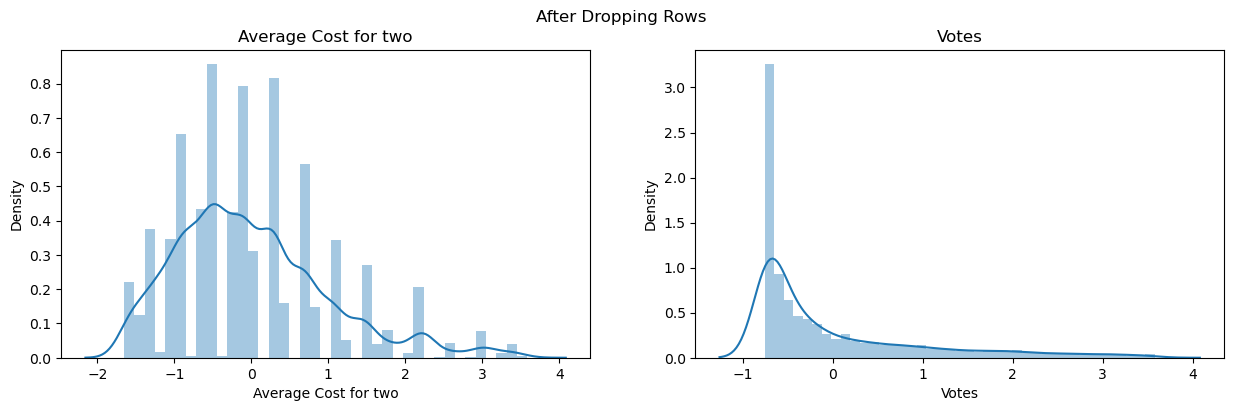

In [121]:
plt.figure(figsize=(15,4))
plt.suptitle('After Dropping Rows ')
plt.subplot(1,2,1)
sns.distplot(df2['Average Cost for two'])
plt.title('Average Cost for two')
plt.subplot(1,2,2)
sns.distplot(df2['Votes'])
plt.title('Votes')
plt.show()

In [71]:

# Drop irrelevant columns
df2.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose'], axis=1, inplace=True)


In [72]:
from category_encoders import TargetEncoder

# List of categorical columns to be target encoded
categorical_columns = ['Country Code', 'City', 'Locality', 'Cuisines', 'Currency', 'Rating color', 'Rating text']

# Initialize the target encoder
target_encoder = TargetEncoder(cols=categorical_columns)

# Apply target encoding
df2[categorical_columns] = target_encoder.fit_transform(df2[categorical_columns], df2['Aggregate rating'])



In [73]:
df2.head(3)

,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
14,2.624092,2.624092,2.554512,2.702993,No,No,No,No,4.153555,4.153555,2.702993,121.038110,14.598890,700,3,4.3,223
15,2.575789,2.533016,2.533016,2.702993,No,No,No,No,3.663453,3.663453,2.702993,121.057040,14.237082,800,3,3.6,29
16,2.575789,2.585059,2.743383,2.702993,No,No,No,No,4.153555,4.153555,2.702993,121.056587,14.237679,850,3,4.0,72


In [74]:
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
df2[binary_columns] = df2[binary_columns].replace({'Yes': 1, 'No': 0})

In [75]:
col=['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
stcaler=StandardScaler()
df2[col]=stcaler.fit_transform(df2[col])

In [78]:
df2.head(3)

,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
14,1.244988,0.524538,0.714992,1.013876,-0.240137,-0.570088,-0.059378,0.0,1.175643,1.175643,1.055038,1.521149,-1.056973,1.061617,2.04172,1.263130,3.094686
15,1.073754,0.388276,0.664379,1.013876,-0.240137,-0.570088,-0.059378,0.0,0.851980,0.851980,1.055038,1.521677,-1.090672,1.449624,2.04172,0.804185,-0.257248
16,1.073754,0.466140,1.159698,1.013876,-0.240137,-0.570088,-0.059378,0.0,1.175643,1.175643,1.055038,1.521664,-1.090617,1.643627,2.04172,1.066439,0.485706


In [79]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_remove_out = df2.drop(['Aggregate rating'], axis=1)
y_remove_out = df2['Aggregate rating']

# Split the data
X_train_remove_out, X_test_remove_out, y_train_remove_out, y_test_remove_out = train_test_split(X_remove_out, y_remove_out, test_size=0.2,
                                                                                                random_state=42)

print(X_train_remove_out.shape, X_test_remove_out.shape)
print(y_train_remove_out.shape, y_test_remove_out.shape)


(6148, 16) (1537, 16)
(6148,) (1537,)


In [80]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [81]:
# Model training
model1 = LinearRegression()
model1.fit(X_train_remove_out, y_train_remove_out)

# Predictions
y_pred_remove_out = model1.predict(X_test_remove_out)

# Evaluation
mse = mean_squared_error(y_test_remove_out, y_pred_remove_out)
r2 = r2_score(y_test_remove_out, y_pred_remove_out)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importance = pd.Series(model.coef_, index=X_remove_out.columns).sort_values(ascending=False)
print(feature_importance)

Mean Squared Error: 0.014037614416248862
R-squared: 0.9860027936248303
Rating color            4.862976e-01
Rating text             4.862976e-01
Locality                1.450816e-02
City                    1.315635e-02
Votes                   1.068193e-02
Currency                9.896581e-03
Cuisines                5.310472e-03
Price range             4.287073e-03
Has Table booking       4.684816e-04
Switch to order menu   -2.775558e-17
Is delivering now      -1.105257e-03
Longitude              -1.339391e-03
Latitude               -1.706851e-03
Has Online delivery    -4.264296e-03
Average Cost for two   -4.353988e-03
Country Code           -1.726538e-02
dtype: float64


In [82]:
print('By Using Capping Technique the R2 Square value is :', r2_score(y_test_cap, y_pred_cap))
print('By Using Removing Outlier Technique the R2 Square value is :', r2_score(y_test_remove_out, y_pred_remove_out))

By Using Capping Technique the R2 Square value is : 0.986481710696612
By Using Removing Outlier Technique the R2 Square value is : 0.9860027936248303


In [83]:
round(r2_score(y_test_cap, y_pred_cap),4),round(r2_score(y_test_remove_out, y_pred_remove_out),4)

(0.9865, 0.986)

<font color='black' style='font-family:Cambria; font-size:21px'>Comparing the Results of Outlier Handling Methods</font><br>

<b><font color='black' style='font-family:cambria; font-size:20px'>Results of Dropping Outliers</font></b>
<br>

<font color="brown" style="font-family:Cambria; font-size:16px">`Mean Squared Error (MSE):` 0.01404</font>
<br>

<font color="brown" style="font-family:Cambria; font-size:16px">`R-squared:` 0.98600</font>
<br>

<b><font color='black' style='font-family:cambria; font-size:20px'>Analysis of Results</font></b>
<br>

- <font color="brown" style="font-family:Cambria; font-size:16px">`R-squared Value:` An R-squared value of 0.98600 suggests that the model explains about 98.60% of the variance in the target variable, which is slightly lower than the 98.65% explained when using capping.</font>
<br>

- <font color="brown" style="font-family:Cambria; font-size:16px">`MSE:` The MSE value of 0.01404 is slightly higher than the MSE of 0.01338 observed with capping. This indicates that the model's predictions are marginally less accurate when outliers are dropped.</font>
<br>

- <font color="brown" style="font-family:Cambria; font-size:16px">`Coefficients for Features:` The coefficients for the features when dropping outliers are similar to those when using capping, indicating a similar influence of the features on the target variable.</font>
<br>

In [84]:
print(f'The cross val score For capping Technique is{cross_val_score(estimator=model,X=X_cap,y=y_cap,cv=5)}')
print(f'The cross val score For Removing Outlier Technique is{cross_val_score(estimator=model1,X=X_remove_out,y=y_remove_out,cv=5)}')

The cross val score For capping Technique is[0.98350407 0.98379979 0.98604848 0.98623044 0.98808815]
The cross val score For Removing Outlier Technique is[0.98577177 0.98304798 0.98667604 0.98557798 0.98779839]


<font color="black" style="font-family:Cambria; font-size:20px">Hyperparameter Tunining</font>

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [86]:
rf_cap=RandomForestRegressor(random_state=42)
rf_remove_out=RandomForestRegressor(random_state=42)

<font color='black' style='font-family:cambria; font-size:20px'>Optimizing Computational Time in Large Datasets</font>

<font color="brown" style="font-family:Cambria; font-size:16px">When dealing with a large dataset, especially when using GridSearchCV with multiple parameters, the computational time can indeed become significant. Here are a few strategies to manage this:</font>
<br>

<font color='black' style='font-family:cambria; font-size:20px'> RandomizedSearchCV</font>
<br>

<font color="brown" style="font-family:Cambria; font-size:16px">Unlike GridSearchCV, RandomizedSearchCV searches a subset of the parameter space specified. This can be faster and still yield good results, especially when the search space is large.</font>
<br>

<font color='black' style='font-family:cambria; font-size:20px'>Parallelize the Search</font>
<br>

<font color="brown" style="font-family:Cambria; font-size:16px">Use the n_jobs parameter in GridSearchCV or RandomizedSearchCV to parallelize the search across multiple CPU cores. This can speed up the process significantly if your machine supports it.</font>


In [87]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the Randomsearch Cv capping
random_search_cap = RandomizedSearchCV(estimator=rf_cap, param_distributions=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

random_search_remove_out = RandomizedSearchCV(estimator=rf_remove_out, param_distributions=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')


# Fit the GridSearchCV
random_search_cap.fit(X_train_cap, y_train_cap)
random_search_remove_out.fit(X_train_remove_out,y_train_remove_out)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='r2', verbose=2)

In [88]:
# Get the best parameters For Capping And Remvoign Outlier Technqiues
best_params_cap = random_search_cap.best_params_

best_params_remove_out = random_search_remove_out.best_params_
print("Best parameters found for Capping is :\n ", best_params_cap)
print('-'*100)
print("Best parameters found for Removing Outlier  is : \n",best_params_remove_out)



Best parameters found for Capping is :
  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
----------------------------------------------------------------------------------------------------
Best parameters found for Removing Outlier  is : 
 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [89]:
# Evaluate the model with the best parameters fro capping and removing outlier
best_rf_cap = random_search_cap.best_estimator_
best_rf_remove_out = random_search_remove_out.best_estimator_

# capping techqniue
y_pred_cap = best_rf_cap.predict(X_test_cap)

mse_cap = mean_squared_error(y_test_cap, y_pred_cap)
r2_cap = r2_score(y_test_cap, y_pred_cap)


# remvoing outlier technqiue
y_pred_remove_out = best_rf_remove_out.predict(X_test_remove_out)
mse_remove_out = mean_squared_error(y_test_remove_out,y_pred_remove_out)
r2_remove_out = r2_score(y_test_remove_out, y_pred_remove_out)



print("Mean Squared Error For Capping Technqiue: ", mse_cap)
print("R-squared For Capping Technqiue:: ", r2_cap)
print('-'*100)
print("Mean Squared Error For Removing Outlier Technqiue: ", mse_remove_out)
print("R-squared For Removing Outlier Technqiue:: ", r2_remove_out)

Mean Squared Error For Capping Technqiue:  0.011304342326867552
R-squared For Capping Technqiue::  0.9885811738952961
----------------------------------------------------------------------------------------------------
Mean Squared Error For Removing Outlier Technqiue:  0.012331505844607887
R-squared For Removing Outlier Technqiue::  0.9877039910696086


In [90]:
round(r2_cap,4),round(r2_remove_out,4)

(0.9886, 0.9877)

In [91]:
print('By Using Capping Techniques ',cross_val_score(estimator=rf_cap,X=X_cap,y=y_cap,cv=5))
print('-'*100)
print('By Using Remvoing Outlier Techniques ',cross_val_score(estimator=rf_remove_out,X=X_remove_out,y=y_remove_out,cv=5))

By Using Capping Techniques  [0.98704011 0.98616225 0.98751974 0.98726648 0.98954718]
----------------------------------------------------------------------------------------------------
By Using Remvoing Outlier Techniques  [0.98820273 0.98488808 0.98791982 0.98673778 0.98925987]


In [92]:
# Define the data
data = {
    'Metrics': ['R2_score', 'MSE', 'RMSE'],
    'Outliers Removed': [0.9860, 0.0140, 0.1183],
    'Capping Technique': [0.9864, 0.0134, 0.1157],
    'Outliers Removed + Hyperparam Tuning': [0.9878, 0.0122, 0.1104],
    'Capping Technique + Hyperparam Tuning': [0.9886, 0.0113, 0.1063]
}


# Create DataFrame
results_df = pd.DataFrame(data)



In [95]:
results_df=results_df.set_index('Metrics')

In [96]:
results_df

,Outliers Removed,Capping Technique,Outliers Removed + Hyperparam Tuning,Capping Technique + Hyperparam Tuning
Metrics,,,,
R2_score,0.9860,0.9864,0.9878,0.9886
MSE,0.0140,0.0134,0.0122,0.0113
RMSE,0.1183,0.1157,0.1104,0.1063


In [103]:
results_df.loc['R2_score']

Outliers Removed                         0.9860
Capping Technique                        0.9864
Outliers Removed + Hyperparam Tuning     0.9878
Capping Technique + Hyperparam Tuning    0.9886
Name: R2_score, dtype: float64

In [104]:
a=results_df.loc['R2_score']
b=results_df.loc['MSE']
c=results_df.loc['RMSE']


In [108]:
# Colors for different segments
colors = ['blue', 'orange', 'green', 'red']
labels = a.index

In [114]:
def plot_r2_mse_rmse(metrics):
    plt.figure(figsize=(14,5))
    for i in range(len(metrics)-1):
        plt.plot(metrics.index[i:i+2], metrics.values[i:i+2], marker='o', linestyle='-', color=colors[i], label=labels[i])
        


    # Add the last segment because in tab we don;t see the poly test color so we are adding
    plt.plot(metrics.index[-2:], metrics.values[-2:], marker='o', linestyle='-', color=colors[-1], label=labels[-1])

    # Setting the legend
    plt.legend(loc='best')

    # Adding grid
    plt.grid(True)
    plt.xlabel('Models')
    
# Adding dynamic title and ylabel based on the first metric (assuming all metrics are of the same type)
    plt.title(f'{metrics.name} for Different Regression Models')
    
    plt.ylabel(metrics.name)

    # Show plot
    plt.show()

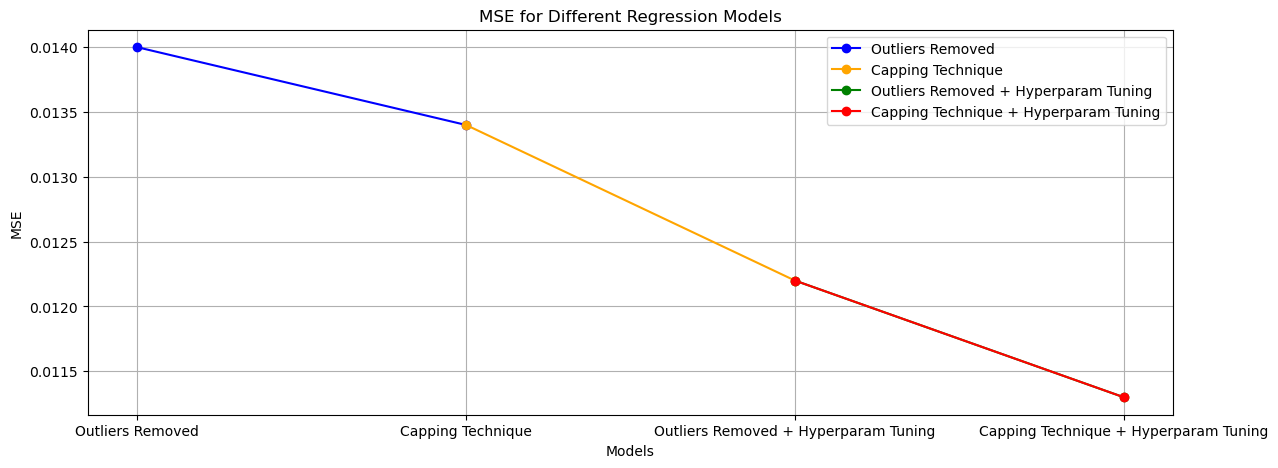

In [118]:
plot_r2_mse_rmse(b)

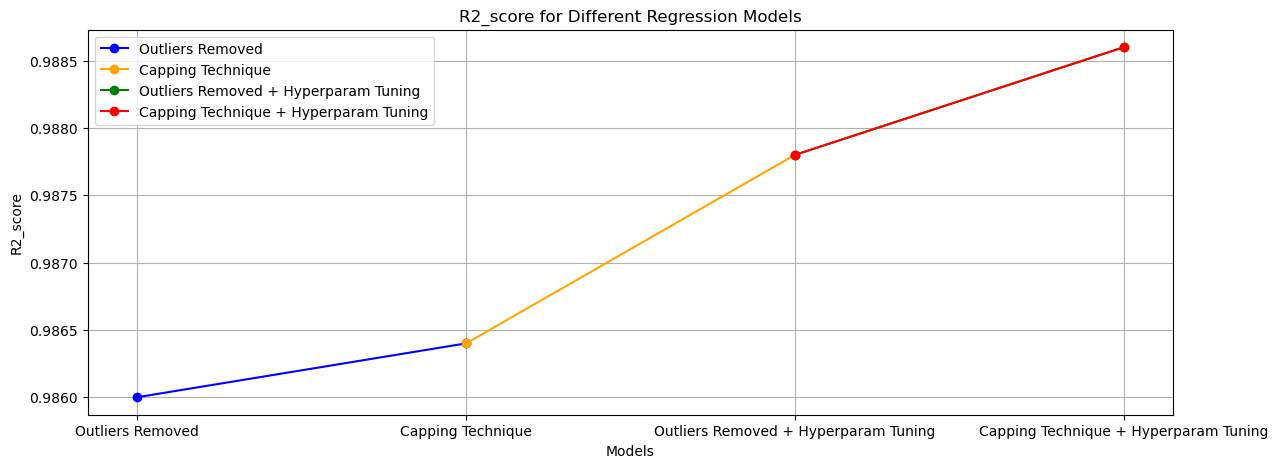

In [115]:
plot_r2_mse_rmse(a)


<b><font color='black' style='font-family:cambria; font-size:16px'>Comparison</font></b>
<br>

- <font color="brown" style="font-family:Cambria; font-size:16px">`MSE:` `Capping technique` resulted in a `lower MSE (0.0113)` compared to `removing outliers (0.0122)` after hyperparameter tuning, indicating potentially better predictive performance.</font>
<br>

- <font color="brown" style="font-family:Cambria; font-size:16px">`R-squared (R²):` `Capping technique` achieved a `higher R-squared value (0.9885)` compared to `removing outliers (0.9878)` after hyperparameter tuning, suggesting a `better fit` to the data.</font>
<br>


<b><font color=black style='font-family:Cambria; font-size:17px'> `Influential Features` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>To understand the factors influencing restaurant ratings, we analyzed the feature importances from the model. Here are the most influential features with brief explanations:</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Rating Color and Rating Text:` Indicate direct feedback on restaurant quality.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Votes:` Reflects the popularity and customer approval of the restaurant.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `City and Locality:` Highlight the impact of geographical and socio-economic factors.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Cuisines:` Show the preference and popularity of specific food types.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Price Range and Average Cost for Two:` Indicate the restaurant's pricing strategy and perceived value.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Currency:` Represents different regions or countries, affecting cultural and economic perspectives.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Has Table Booking:` Indicates the convenience factor of booking tables.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Has Online Delivery:` Enhances customer convenience and service quality.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Longitude and Latitude:` Geographical coordinates affecting spatial distribution and proximity to popular areas.</font><br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Insights and Recommendations` </font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Quality Indicators:` Focus on improving aspects like rating color, text, and votes to enhance ratings.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Location Strategy:` Strategic location planning is vital for better ratings.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Service Enhancements:` Providing table booking and online delivery can boost customer satisfaction.</font><br>

- <font color=blue style='font-family:Cambria; font-size:15px'> `Cost Management:` Balancing pricing strategies to match customer expectations and perceived value can positively influence ratings.</font><br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Summary` </font></b><br>

<font color=blue style='font-family:Cambria; font-size:15px'>Our model's results highlight the importance of several features in determining restaurant ratings. By focusing on these influential factors, restaurants can strategically improve their ratings and customer satisfaction.</font><br>
